<a href="https://colab.research.google.com/github/invegat/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

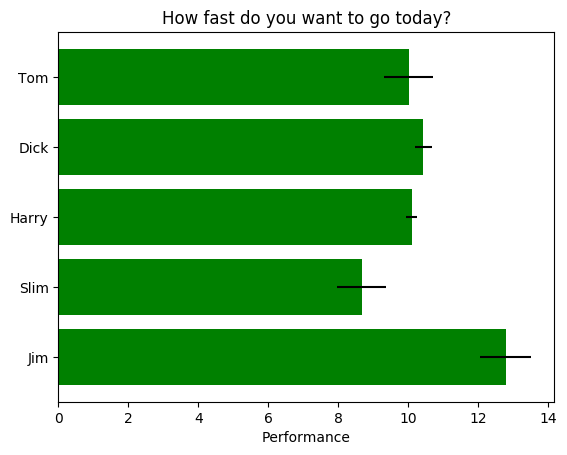

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

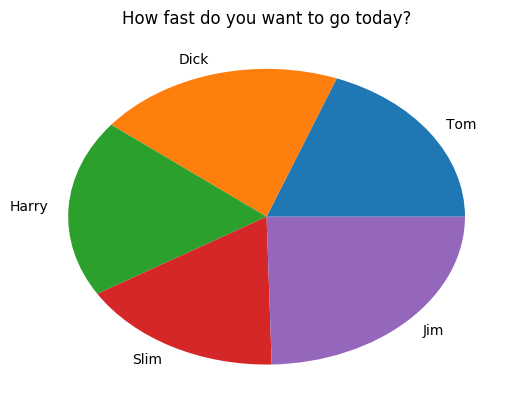

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


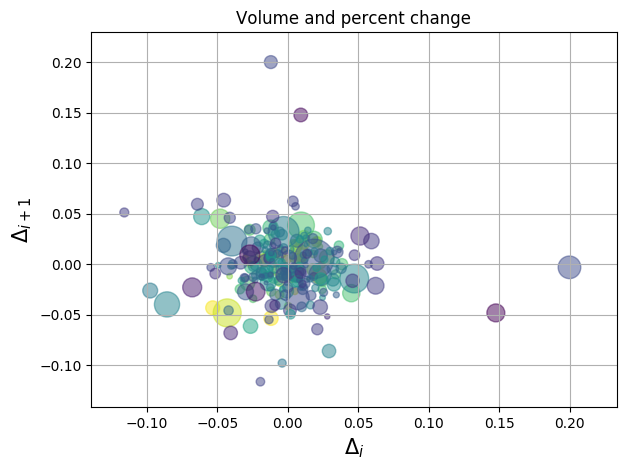

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

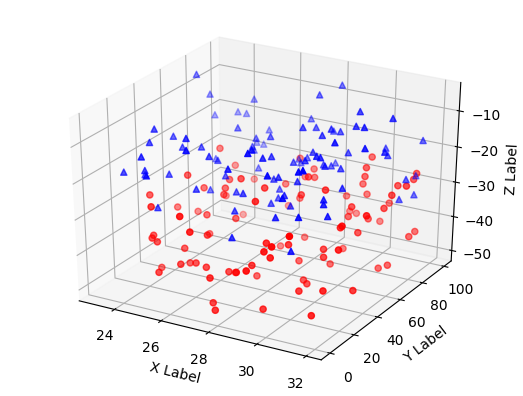

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Plot assignment

Draw at least 3 plots with the data you loaded yesterday.

In [0]:
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
import pandas as pd


In [0]:
import pandas as pd
from requests import get
from contextlib import closing

In [0]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None
      
def simple_get_text(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of text, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response_text(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None

def is_good_response_text(resp):
    """
    Returns True if the response seems to be Text, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('text') > -1)      

def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [0]:
import regex
from requests import get
from contextlib import closing
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names'
text = None
with closing(get(url, stream=True)) as resp:
  text = resp.content.decode('UTF-8')

stext = "Attribute Information:\n"
etext = "\n\n8. Missing values"

ctext = text[text.index(stext)+len(stext):text.index(etext)]
r = regex.compile(r"(?<=\d{1,2}\.\s+)(\w+)")
flag_data = pd.read_csv(flag_data_url, header=None, names=[name for name in r.findall(ctext)])
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [0]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


In [0]:
import pandas as pd
chd = pd.read_csv('https://data.cdc.gov/api/views/6vp6-wxuq/rows.csv?accessType=DOWNLOAD') # census health data

In [0]:
chd.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,15.7,NaN,NaN,308745538.0,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2015,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,15.0,NaN,NaN,308745538.0,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
2,2015,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,22.7,NaN,NaN,308745538.0,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
3,2015,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,24.9,NaN,NaN,308745538.0,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
4,2015,US,United States,NaN,US,BRFSS,Unhealthy Behaviors,59,Binge drinking among adults aged >=18 Years,%,...,17.4,NaN,NaN,308745538.0,NaN,UNHBEH,BINGE,NaN,NaN,Binge Drinking


In [0]:
chddv = chd[chd['Data_Value'].notnull()]


Measure
All teeth lost among adults aged >=65 Years                                                                                                                                                       28601
Arthritis among adults aged >=18 Years                                                                                                                                                            29006
Binge drinking among adults aged >=18 Years                                                                                                                                                       29006
Cancer (excluding skin cancer) among adults aged >=18 Years                                                                                                                                       29006
Cholesterol screening among adults aged >=18 Years                                                                                                                                              

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from sklearn.linear_model import LinearRegression
import math
%matplotlib notebook
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')
#plt.subplot(444)

ax = fig.add_subplot(111, projection='3d')
xs =chddv[chddv.Measure == 'High blood pressure among adults aged >=18 Years']['Data_Value']  
ys = chddv[chddv.Measure == 'Current smoking among adults aged >=18 Years']['Data_Value']  
zs = chddv[chddv.Measure == 'Cancer (excluding skin cancer) among adults aged >=18 Years']['Data_Value']

l = xs.shape[0]
# print(xs.values[0])

rs = -l *np.random.random_sample((100,)) + l
#print(rs)                                  
xss = np.array([xs.values[math.floor(i)] for i in rs]).reshape(100,)
yss = np.array([ys.values[math.floor(i)] for i in rs]).reshape(100,)
zss = np.array([zs.values[math.floor(i)] for i in rs]).reshape(100,)
aa = []
z = zip(xss,yss)
for t in z:
    aa.append([t[0],t[1]])
a = np.array(aa).reshape(100,2)

# def normalize(d):
#     # d is a (n x dimension) np array
# #     d -= np.min(d, axis=0)
# #     d /= np.ptp(d, axis=0)
#     return d
    
#plt.rcParams['figure.figsize'] = (10,10)    
# print(xss.shape,yss.shape,zss.shape,type(xss),a.shape)
ax.scatter(xss, yss, zss, c='r', marker='^', s=80)

# print(normalize(xss.reshape(100,)))
# print(f'type xss {type(xss)} min {xss.min()} max {xss.max()} shape {xss.reshape(100,).shape}')
# print(f'type yss {type(yss)} min {yss.min()} max {yss.max()} shape {yss.shape}')
# print(f'type zss {type(zss)} min {zss.min()} max {zss.max()} shape {zss.shape} ')

#print(len(xs),len(ys))
#print(xs.head(),ys.head(),type(xs))
# a = np.matrix([xss,yss])
zss = zss.reshape(100,)
# print(a.shape,zss.shape)

X, Y = np.meshgrid(xss, yss)

model = LinearRegression().fit(a, zss)
coef_ = model.coef_
intercept_ = model.intercept_
# print('𝛽₁: {}  𝛽₂: {}  𝛽₀ {}'.format(coef_[0], coef_[1], model.intercept_))

def f(x,y):
    z = coef_[0] * x + coef_[1] * y + intercept_
    return z

Z = f(X,Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor=None, alpha=0.01)
ax.set_xlabel('High BP')
ax.set_ylabel('Smoking')

ax.set_zlabel('Cancer')
plt.show()

shape: (810103, 24)


20671

In [0]:
sr = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')
sr.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [0]:
sr.shape

(985, 12)

In [0]:
#sr.groupby('zip')['zip'].count()


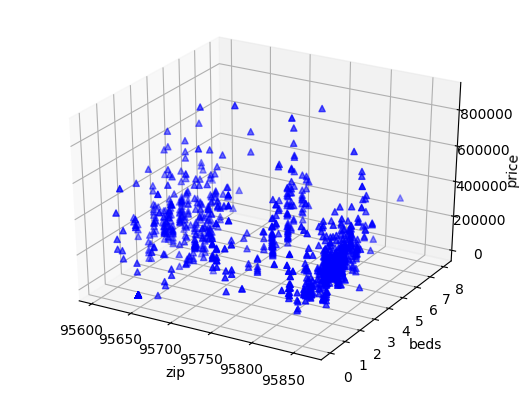

In [0]:
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = sr['zip']
ys = sr['beds']
zs = sr['price']
ax.scatter(xs, ys, zs, c='b', marker='^')

ax.set_xlabel('zip')
ax.set_ylabel('beds')
ax.set_zlabel('price')

plt.show()